DIGIT CLASSIFICATION USING MNIST DATASET.

Libraries used:

1. Tensor flow

2. Keras

3. Matplotlib

4. Numpy

5. Seaborn

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,Y_train) , (X_test,Y_test) = keras.datasets.mnist.load_data()
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
#scaling
X_train = X_train/255 
X_test = X_test/255

In [4]:
print("Samples in our training set : {}".format(len(X_train)))
print("Samples in our test set : {}".format(len(X_test)))
#print(X_train[0])

Samples in our training set : 60000
Samples in our test set : 10000


Corresponding test sample for the image : 7
Printing the 1st sample from training data


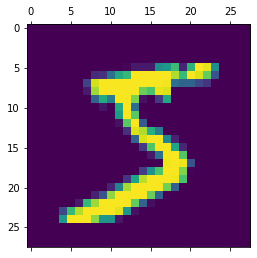

In [5]:
#first training image
plt.matshow(X_train[0])
print("Corresponding test sample for the image : {}".format(Y_test[0]))
print("Printing the 1st sample from training data")

In [6]:
print("Shape of the given training dataset : {}".format(X_train.shape))
print("Shape of the given testing dataset : {}".format(Y_test.shape))
X_train_vector = X_train.reshape(len(X_train),28*28)
X_test_vector = X_test.reshape(len(X_test),28*28)
print("Training dataset and testing dataset is vectorised below : ")
print("New Shape of the given training dataset : {}".format(X_train_vector.shape))
print("New Shape of the given testinf dataset : {}".format(X_train_vector.shape))

Shape of the given training dataset : (60000, 28, 28)
Shape of the given testing dataset : (10000,)
Training dataset and testing dataset is vectorised below : 
New Shape of the given training dataset : (60000, 784)
New Shape of the given testinf dataset : (60000, 784)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4855 - accuracy: 0.8768
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3056 - accuracy: 0.9158
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2850 - accuracy: 0.9216
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2746 - accuracy: 0.9237
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2677 - accuracy: 0.9258: 0s - loss: 0.2673 - accuracy: 0.92
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2625 - accuracy: 0.

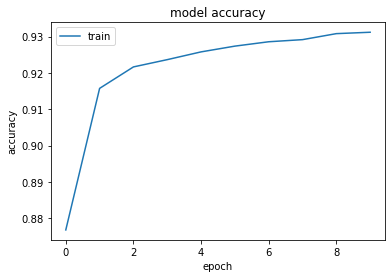

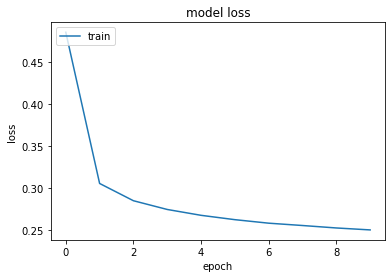

In [7]:
#No hidden layers are included here
#784 input neurons and 10 output neurons
#Making our neural network
model = keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])
#putting our desired optimizer,loss and metrices
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print(model.summary())

#training
history = model.fit(X_train_vector,Y_train,epochs = 10) #accuracy over train data set

#Plotting the graph of accuracy VS epoch
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

#Plotting the graph of loss VS epoch
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [31]:
#accuracy over testing data set
loss_n_accuracy = model.evaluate(X_test_vector,Y_test)
print("Loss of the model with respect to test data before adding hidden layer      : {:.4f}%".format(loss_n_accuracy[0]*100))
print("Accuracy of the model with respect to test data before adding hidden layer  : {:.4f}%".format(loss_n_accuracy[1]*100))

313/313 [==============================] - 0s 1ms/step - loss: 0.0874 - accuracy: 0.9735
Loss of the model with respect to test data before adding hidden layer      : 8.7359%
Accuracy of the model with respect to test data before adding hidden layer  : 97.3500%


Text(69.0, 0.5, 'Truth')

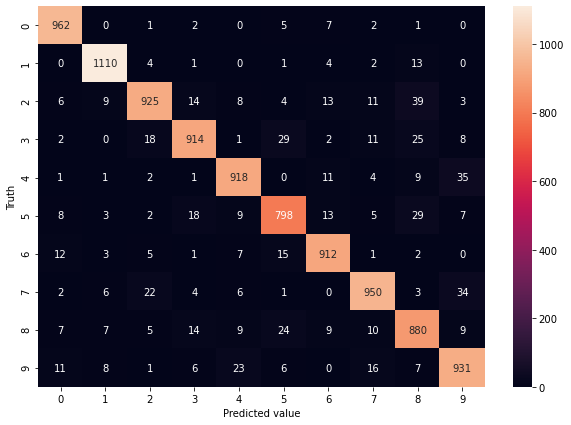

In [9]:
y_predicted = model.predict(X_test_vector) # whole values
#y_predicted[0]
#plt.matshow(X_test[0])
y_predicted_label = [np.argmax(i) for i in y_predicted]
#np.argmax(y_predicted[0])
#y_predicted_label[0:5]
mat = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_label)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(mat,annot=True,fmt='d')
plt.xlabel('Predicted value')
plt.ylabel('Truth')

In [23]:
model = keras.Sequential([
    #100: no. of hidden layer neuron taken random, should be less than 784
    keras.layers.Dense(100,input_shape=(784,),activation='relu'), 
    #keras.layers.Dense(100,input_shape=(784,),activation='relu'), 
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#print(model.weights[0])
print(model.summary())
fname = "weight-test-CNN.hdf5"


history = model.fit(X_train_vector,Y_train,epochs = 5)
model.save_weights(fname,overwrite = True)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2930 - accuracy: 0.9191
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1344 - accuracy: 0.9606
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0977 - accuracy: 0.9717
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0769 - accuracy: 0.9767
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0616 - accuracy: 0.9814


In [ ]:
#history.history??

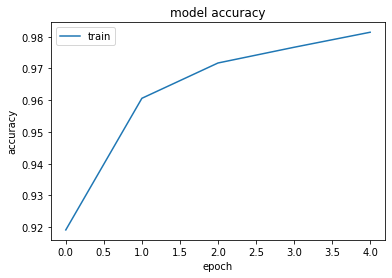

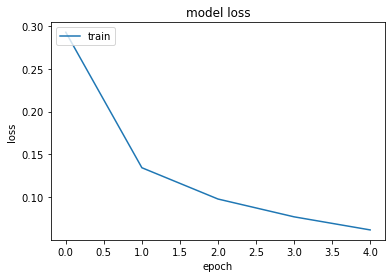

In [24]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [30]:
loss_and_accuracy = model.evaluate(X_test_vector,Y_test)
print("Loss of the model with respect to test data after adding hidden layer     : {:.4f}%".format(loss_and_accuracy[0]*100))
print("Accuracy of the model with respect to test data after adding hidden layer : {:.4f}%".format(loss_and_accuracy[1]*100))

313/313 [==============================] - 0s 1ms/step - loss: 0.0874 - accuracy: 0.9735
Loss of the model with respect to test data after adding hidden layer     : 8.7359%
Accuracy of the model with respect to test data after adding hidden layer : 97.3500%


Text(69.0, 0.5, 'True Values')

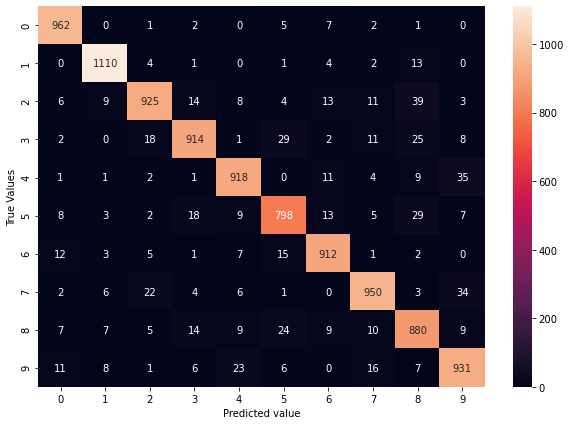

In [28]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(mat,annot=True,fmt='d')
plt.xlabel('Predicted value')
plt.ylabel('True Values')